In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import export_graphviz

In [3]:
df_train=pd.read_csv("C:/Users/user/workspace/data/titanic/train.csv")
print(df_train.shape)
df_train.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test=pd.read_csv("C:/Users/user/workspace/data/titanic/test.csv")
#df_test.head(5)

In [5]:
df_train1=df_train.copy(deep=True)

print(df_train.isna().sum())

survived_counts=np.array(df_train1['Survived'].value_counts())
pclass_counts=np.array(df_train1['Pclass'].value_counts())
sex_counts=np.array(df_train1['Sex'].value_counts())
embarked_counts=np.array(df_train1['Embarked'].value_counts())
print(df_train1['Survived'].value_counts(), '\n')
print(df_train1['Pclass'].value_counts(), '\n')
print(df_train1['Sex'].value_counts(), '\n')
print(df_train1['Embarked'].value_counts(), '\n')

df_train1['Embarked']=df_train1['Embarked'].fillna('S')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0    549
1    342
Name: Survived, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 

male      577
female    314
Name: Sex, dtype: int64 

S    644
C    168
Q     77
Name: Embarked, dtype: int64 



age mean = 29.7 
age median = 28.0 
age mode = 24.0


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


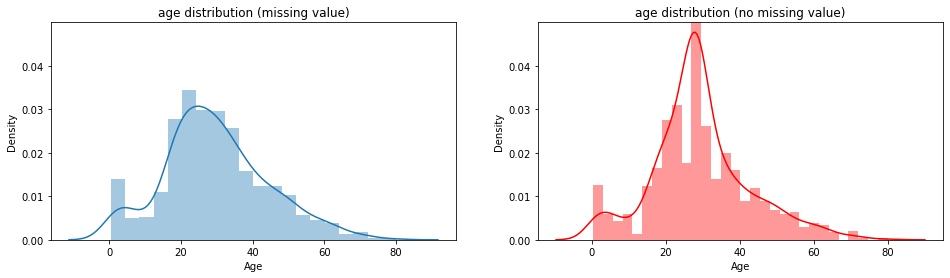

In [6]:
#age missing value treatment
#data visualization

print('age mean = %.1f' % df_train['Age'].mean(), '\n'+
     'age median =', df_train['Age'].median(), '\n'+
     'age mode =', df_train['Age'].value_counts().index[0])

df_train1['Age']=df_train1['Age'].fillna(df_train1['Age'].median())

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(df_train['Age'])
plt.yticks([i/100 for i in range(0,5,1)])
plt.ylim(0,0.05)
plt.title('age distribution (missing value)')

plt.subplot(1, 2, 2)
#sns.kdeplot(df_train1['Age'], shade=True, color='red')
sns.distplot(df_train1['Age'], color='red')
plt.yticks([i/100 for i in range(0,5,1)])
plt.ylim(0,0.05)
plt.title('age distribution (no missing value)')
plt.show()

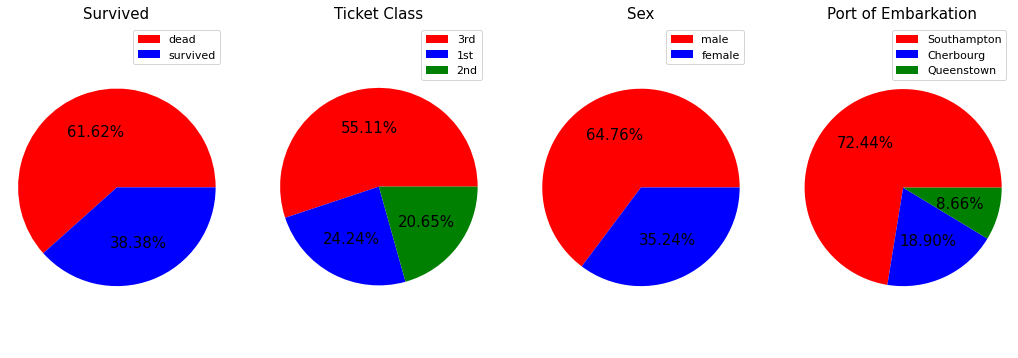

In [7]:
#data visualization (category variable)

plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.pie(survived_counts, colors=['red', 'blue'], autopct='%.2f%%', textprops={'fontsize': 15})
plt.legend(['dead', 'survived'], loc='best', fontsize=11)
plt.title('Survived', fontsize=15)
plt.axis('equal')

plt.subplot(1, 4, 2)
plt.pie(pclass_counts, colors=['red', 'blue', 'green'], autopct='%.2f%%', textprops={'fontsize': 15})
plt.legend(['3rd', '1st', '2nd'], loc='best', fontsize=11)
plt.title('Ticket Class', fontsize=15)
plt.axis('equal')

plt.subplot(1, 4, 3)
plt.pie(sex_counts, colors=['red', 'blue'], autopct='%.2f%%', textprops={'fontsize': 15})
plt.legend(['male', 'female'], loc='best', fontsize=11)
plt.title('Sex', fontsize=15)
plt.axis('equal')

plt.subplot(1, 4, 4)
plt.pie(embarked_counts, colors=['red', 'blue', 'green'], autopct='%.2f%%', textprops={'fontsize': 15})
plt.legend(['Southampton', 'Cherbourg', 'Queenstown'], loc='best', fontsize=11)
plt.title('Port of Embarkation', fontsize=15)
plt.axis('equal')
plt.show()

In [8]:
#model feature selection

x=df_train1.drop(['PassengerId', 'Survived', 'Pclass', 'Name', 'Ticket', 'Cabin'], axis='columns')
#labelencoder=LabelEncoder()
#x.Pclass=labelencoder.fit_transform(x.Pclass)
x=pd.get_dummies(x, columns=['Sex', 'Embarked'])
x=x.drop(['Sex_female', 'Embarked_C'], axis='columns')
print(x.head(5), '\n')
print(x.dtypes, '\n')
#print(x.isna().sum(), '\n')
print(x.info(), '\n')

y=df_train1.Survived
print(y.head(10))

    Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0  22.0      1      0   7.2500         1           0           1
1  38.0      1      0  71.2833         0           0           0
2  26.0      0      0   7.9250         0           0           1
3  35.0      1      0  53.1000         0           0           1
4  35.0      0      0   8.0500         1           0           1 

Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male        uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Sex_male    891 non-null    uint8  
 5   Embarked_Q  891 non-null    uint8  
 6   E

In [9]:
#model feature treatment (dataframe to matrix)

dvec=DictVectorizer(sparse=False)
x1=dvec.fit_transform(x.to_dict(orient='records'))
#x_test=dvec.transform(x_test.to_dict(orient='records'))
# 列印特徵向量格式
print(dvec.feature_names_)

x_train, x_test, y_train, y_test=train_test_split(x1, y, random_state=1, train_size=0.8)
print(x_train)

['Age', 'Embarked_Q', 'Embarked_S', 'Fare', 'Parch', 'Sex_male', 'SibSp']
[[28.  1.  0. ...  0.  1.  2.]
 [30.  0.  0. ...  0.  0.  0.]
 [34.  0.  1. ...  0.  0.  0.]
 ...
 [21.  0.  1. ...  0.  1.  0.]
 [28.  0.  1. ...  0.  0.  0.]
 [21.  0.  1. ...  0.  1.  0.]]


In [10]:
#model1: Logistic Regression

model1=LogisticRegression(max_iter=1000)
model1.fit(x_train, y_train)
print(model1.predict(x_test), '\n')
print(model1.coef_)
print('cross validation:', np.mean(cross_val_score(model1, x_train, y_train)))
print('correct:', model1.score(x_test, y_test))

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1] 

[[-0.01980106 -0.48625707 -0.42758237  0.01422634 -0.12016445 -2.50184235
  -0.41454816]]
cross validation: 0.7908401457697233
correct: 0.7821229050279329


In [11]:
#model2: Random Forest

model2=RandomForestClassifier()
model2.fit(x_train, y_train)
print(model2.predict(x_test), '\n')
print('cross validation:', np.mean(cross_val_score(model2, x_train, y_train, cv=10)))
print('correct:', model2.score(x_test, y_test))

estimator=model2.estimators_[5]
export_graphviz(estimator, out_file="C:/Users/user/workspace/data/titanic/titanic_forest.dot", 
                feature_names=dvec.feature_names_, 
                class_names=["0", "1"], 
                rounded=True, proportion=False, 
                precision=2, filled=True)
#dot -Tpng titanic_forest.dot -o titanic_forest.png

[1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1
 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1] 

cross validation: 0.817605633802817
correct: 0.7597765363128491


In [12]:
#prediction output

df_test['Age']=df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

test_x=df_test.drop(['PassengerId', 'Pclass', 'Name', 'Ticket', 'Cabin'], axis='columns')
test_x=pd.get_dummies(test_x, columns=['Sex', 'Embarked'])
test_x=test_x.drop(['Sex_female', 'Embarked_C'], axis='columns')
print(test_x.info())

test_dvec=DictVectorizer(sparse=False)
test_x1=test_dvec.fit_transform(test_x.to_dict(orient='records'))
print(test_dvec.feature_names_)
#print(model1.predict(test_x))

output1=pd.DataFrame({
    "PassengerId":df_test.PassengerId,
    "Survived":model1.predict(test_x)
})
output1.head(5)
output1.to_csv("C:/Users/user/workspace/data/titanic/submission_logistic.csv", index=False)

output2=pd.DataFrame({
    "PassengerId":df_test.PassengerId,
    "Survived":model2.predict(test_x)
})
output2.head(5)
output2.to_csv("C:/Users/user/workspace/data/titanic/submission_forest.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Sex_male    418 non-null    uint8  
 5   Embarked_Q  418 non-null    uint8  
 6   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(3)
memory usage: 14.4 KB
None
['Age', 'Embarked_Q', 'Embarked_S', 'Fare', 'Parch', 'Sex_male', 'SibSp']
